In [1]:
# Classification with MNIST dataset 70000 images
# http://yann.lecun.com/exdb/mnist/

In [2]:
import pandas as pd
import numpy as np
import gc
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
%matplotlib inline

In [3]:
# Function to read csv file
def read_file(filename):
    line_count = 0
    file_open = open(filename,"r")
    data_array = []
    for line in iter(file_open):
        line1 = line.rstrip()
        line_split=line1.split(",")
        data_array.append(line_split)
    return data_array

In [4]:
mnist_train = read_file("mnist_train.csv")
dataset = np.array(mnist_train)
X2 = dataset[:,1:785]
y2 = dataset[:,0]

In [5]:
X = X2.astype(np.int)
y = y2.astype(np.int)

In [6]:
print(X.shape)
print(y.shape)

(60000, 784)
(60000,)


In [7]:
print(X[0]) # print the first column. 0 is black and 255 is white. seems inverted

[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0   0   0   3  18  18  18 126 136 175  26 166 255
 247 127   0   0   0   0   0   0   0   0   0   0   0   0  30  36  94 154
 170 253 253 253 253 253 225 172 253 242 195  64   0   0   0   0   0   0
   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251  93  82
  82  56  39   0   0   0   0   0   0   0   0   0   0   0   0  18 219 253
 253 253 253 253 198 182 247 241   0   0   0   0   

In [8]:
print(y[0]) # this is the label. its value is 5

5


In [9]:
# Not using X2 and y2; delete
del [[X2,y2]]
gc.collect() # gc is garbage collector

0

In [10]:
mnist_test = read_file("mnist_test.csv")
dataset_test = np.array(mnist_test)
X2_test = dataset_test[:,1:785]
y2_test = dataset_test[:,0]

In [11]:
X_test = X2_test.astype(np.int)
y_test = y2_test.astype(np.int)
print(X_test.shape)
print(y_test.shape)

(10000, 784)
(10000,)


In [12]:
# Not using X2_test and y2_test; make it minimum
del [[X2_test,y2_test]]
gc.collect()

0

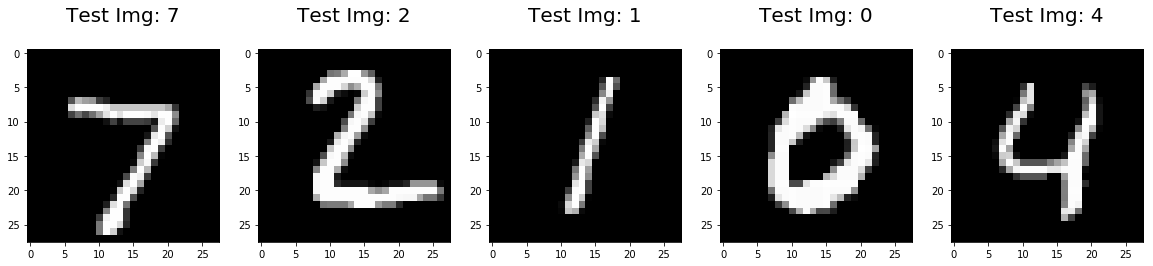

In [13]:
plt.figure(figsize=(20,4)) # let's see what the images look like. quick sanity check
for index, (image, label) in enumerate(zip(X_test[0:5], y_test[0:5])):
    plt.subplot(1, 5, index + 1)
    plt.imshow(np.reshape(image, (28,28)), cmap=plt.cm.gray)
    plt.title('Test Img: %i\n' % label, fontsize = 20)

In [14]:
## Naive Bayes Classification
from sklearn.naive_bayes import GaussianNB
model = GaussianNB()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

GaussianNB(priors=None, var_smoothing=1e-09)
              precision    recall  f1-score   support

           0       0.79      0.89      0.84       980
           1       0.85      0.95      0.90      1135
           2       0.90      0.26      0.40      1032
           3       0.71      0.35      0.47      1010
           4       0.88      0.17      0.29       982
           5       0.55      0.05      0.09       892
           6       0.65      0.93      0.77       958
           7       0.88      0.27      0.42      1028
           8       0.28      0.67      0.40       974
           9       0.37      0.95      0.53      1009

   micro avg       0.56      0.56      0.56     10000
   macro avg       0.69      0.55      0.51     10000
weighted avg       0.69      0.56      0.52     10000

[[ 870    0    3    5    2    5   31    1   35   28]
 [   0 1079    2    1    0    0   10    0   38    5]
 [  79   25  266   91    5    2  269    4  271   20]
 [  32   39    6  353    2    3   51 

In [15]:
# Knn- classification
# k-Nearest Neighbor Classification
from sklearn.neighbors import KNeighborsClassifier
model = KNeighborsClassifier()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
print(metrics.confusion_matrix(expected, predicted))

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')
              precision    recall  f1-score   support

           0       0.96      0.99      0.98       980
           1       0.95      1.00      0.98      1135
           2       0.98      0.96      0.97      1032
           3       0.96      0.97      0.97      1010
           4       0.98      0.96      0.97       982
           5       0.97      0.97      0.97       892
           6       0.98      0.99      0.98       958
           7       0.96      0.96      0.96      1028
           8       0.99      0.94      0.96       974
           9       0.96      0.95      0.95      1009

   micro avg       0.97      0.97      0.97     10000
   macro avg       0.97      0.97      0.97     10000
weighted avg       0.97      0.97      0.97     10000

[[ 974    1    1    0    0    1    2    1    0    0]
 [   0 1133    2    0

In [16]:
# Decision Tree Classifier
from sklearn.tree import DecisionTreeClassifier
model = DecisionTreeClassifier()
model.fit(X,y)
print(model)
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
print(cm)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')
              precision    recall  f1-score   support

           0       0.92      0.93      0.92       980
           1       0.95      0.96      0.95      1135
           2       0.87      0.86      0.87      1032
           3       0.83      0.85      0.84      1010
           4       0.87      0.88      0.87       982
           5       0.83      0.83      0.83       892
           6       0.90      0.89      0.89       958
           7       0.91      0.90      0.91      1028
           8       0.83      0.80      0.82       974
           9       0.84      0.85      0.84      1009

   micro avg       0.88      0.88      0.88     10000


In [17]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver = 'lbfgs',random_state=10)
model.fit(X,y)
print(model)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of ite

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='warn',
          n_jobs=None, penalty='l2', random_state=10, solver='lbfgs',
          tol=0.0001, verbose=0, warm_start=False)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


In [18]:
# make predictions
expected = y_test
predicted = model.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(expected, predicted))
cm = metrics.confusion_matrix(expected, predicted)
print(cm)

              precision    recall  f1-score   support

           0       0.95      0.98      0.96       980
           1       0.96      0.98      0.97      1135
           2       0.93      0.88      0.90      1032
           3       0.90      0.91      0.90      1010
           4       0.93      0.93      0.93       982
           5       0.91      0.86      0.88       892
           6       0.94      0.95      0.94       958
           7       0.93      0.92      0.92      1028
           8       0.84      0.88      0.86       974
           9       0.90      0.90      0.90      1009

   micro avg       0.92      0.92      0.92     10000
   macro avg       0.92      0.92      0.92     10000
weighted avg       0.92      0.92      0.92     10000

[[ 957    0    0    4    0    3    6    2    6    2]
 [   0 1116    3    1    0    1    4    1    8    1]
 [   8   12  905   18    9    5   10   11   51    3]
 [   3    0   19  915    2   22    5   11   25    8]
 [   1    2    4    3  911   

In [19]:
# Done with X and y
del [[X,y]]
gc.collect()

10533

Text(0.5, 103.73999999999997, 'Predicted label')

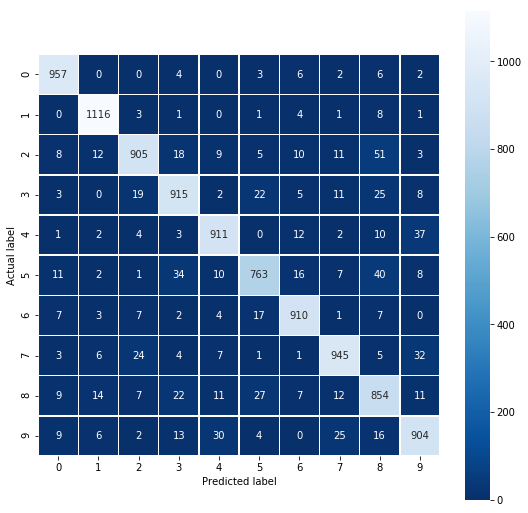

In [20]:
plt.figure(figsize=(9,9))
sns.heatmap(cm, annot=True, fmt=".0f", linewidths=.5, square = True, cmap = 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label')

In [21]:
# Returns a NumPy Array
# Predict for One Observation (image)
model.predict(X_test[0].reshape(1,-1))
yy = model.predict(X_test[0].reshape(1,-1))
print(yy[0])

7


In [22]:
# Predict for Multiple Observations (images) at Once
model.predict(X_test[0:10])

array([7, 2, 1, 0, 4, 1, 4, 9, 6, 9])

In [23]:
# Make predictions on entire test data
predictions = model.predict(X_test)

In [24]:
score = model.score(X_test,y_test)
print(score)

0.918


In [25]:
index = 0
misclassifiedIndexes = []
for label, predict in zip(y_test, predictions):
    if label != predict: 
        misclassifiedIndexes.append(index)
    index +=1
print("Number of images misclassified: ",len(misclassifiedIndexes))
print(misclassifiedIndexes[0:5])

Number of images misclassified:  820
[8, 33, 38, 63, 66]


In [26]:
def print_rounded_probabilities(list1):
    class_digit = 0
    for x in list1:
        y = round(x,2)
        print(class_digit,"==>",y)
        class_digit += 1

In [27]:
# Make probabilities on entire test data
probabilities = model.predict_proba(X_test)
print(len(probabilities))
print(probabilities[0])

10000
[1.52418796e-06 2.32279860e-16 7.41007732e-06 1.23834792e-02
 8.24328036e-07 2.23210522e-04 1.34583692e-10 9.83759674e-01
 1.29972306e-04 3.49390576e-03]


In [28]:
print_rounded_probabilities(probabilities[0])

0 ==> 0.0
1 ==> 0.0
2 ==> 0.0
3 ==> 0.01
4 ==> 0.0
5 ==> 0.0
6 ==> 0.0
7 ==> 0.98
8 ==> 0.0
9 ==> 0.0


In [29]:
print_rounded_probabilities(probabilities[8])
print(y_test[8])

0 ==> 0.0
1 ==> 0.0
2 ==> 0.0
3 ==> 0.0
4 ==> 0.03
5 ==> 0.01
6 ==> 0.96
7 ==> 0.0
8 ==> 0.0
9 ==> 0.0
5


In [30]:
print_rounded_probabilities(probabilities[33])
print(y_test[33])

0 ==> 0.22
1 ==> 0.0
2 ==> 0.0
3 ==> 0.0
4 ==> 0.28
5 ==> 0.0
6 ==> 0.49
7 ==> 0.0
8 ==> 0.0
9 ==> 0.0
4


In [31]:
# save the model to disk
import pickle
filename = 'mnist_logreg.pkl'
pickle.dump(model, open(filename, 'wb'))

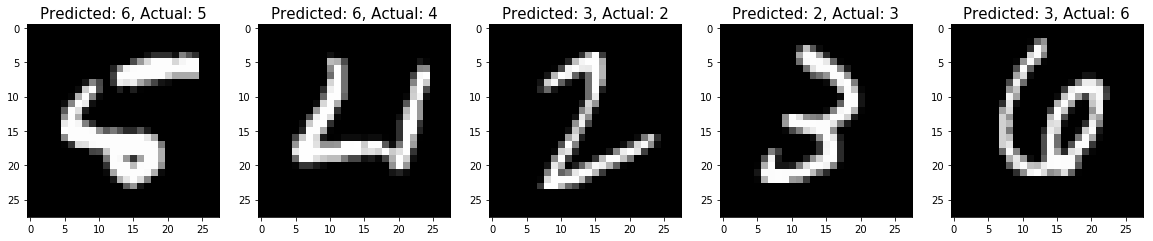

In [32]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[0:5]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

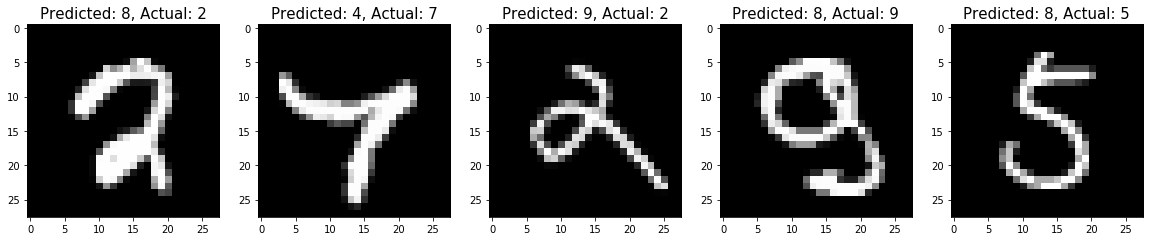

In [33]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[5:10]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

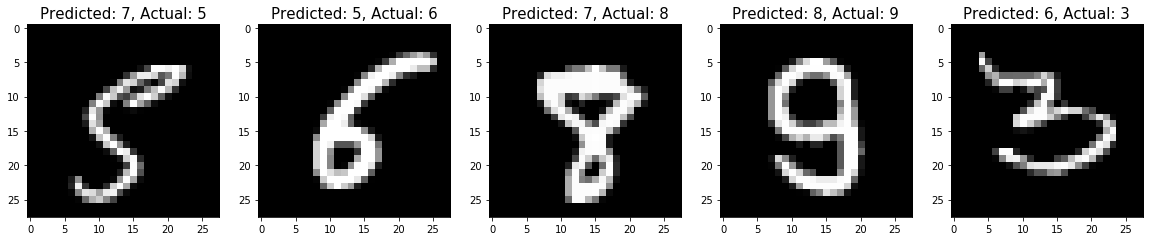

In [34]:
plt.figure(figsize=(20,4))
for plotIndex, badIndex in enumerate(misclassifiedIndexes[11:16]):
    plt.subplot(1, 5, plotIndex + 1)
    plt.imshow(np.reshape(X_test[badIndex], (28,28)), cmap=plt.cm.gray)
    plt.title('Predicted: {}, Actual: {}'.format(predictions[badIndex], y_test[badIndex]), fontsize = 15)

In [35]:
# Done with X_test, y_test, predictions,misclassifiedIndexes
del [[X_test,y_test,predictions,misclassifiedIndexes]]
gc.collect()

31519

In [36]:
import gzip
line_count = 0
with gzip.open('train-images-idx3-ubyte.gz','r') as fin:
    for line in fin:
        line_count += 1
        if (line_count < 2):
            print('got line', line,"\n")

FileNotFoundError: [Errno 2] No such file or directory: 'train-images-idx3-ubyte.gz'

In [ ]:
# How to read image and dump pixel data
# PIL => Python Imaging Library
from PIL import Image
import numpy as np 
im = Image.open('1339.png') #relative path to file 
im.show()

In [ ]:
print(im.format)
print(im.size)
pic_array = np.array(im)
pic_flat_list = pic_array.reshape(-1)
pic_list = pic_flat_list.tolist()
pic_string = ",".join(map(lambda x: str(x),pic_list))
file_write = open("pic1.csv","w")
file_write.write(pic_string)
file_write.close()  
print(pic_string)